# Bibliotecas

In [1]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.8 MB/s eta 0:00:00


In [2]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as sts
from faker import Faker
from datetime import datetime, timedelta
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Simulação

## Simulação estrutura etária

In [3]:
# Seed
np.random.seed(45242)

In [4]:
# Função para gerar idades com base nas proporções
def gerar_idades(proporcoes, num_pessoas):
    idades_simuladas = []
    total_gerado = 0

    for faixa, proporcao in proporcoes.items():
        num_pessoas_faixa = int(num_pessoas * proporcao)
        total_gerado += num_pessoas_faixa

        if faixa == '0-25':
            idades_simuladas.extend(np.random.randint(18, 26, size=num_pessoas_faixa))
        elif faixa == '26-30':
            idades_simuladas.extend(np.random.randint(26, 31, size=num_pessoas_faixa))
        elif faixa == '31-35':
            idades_simuladas.extend(np.random.randint(31, 36, size=num_pessoas_faixa))
        elif faixa == '36-40':
            idades_simuladas.extend(np.random.randint(36, 41, size=num_pessoas_faixa))
        elif faixa == '41-45':
            idades_simuladas.extend(np.random.randint(41, 46, size=num_pessoas_faixa))
        elif faixa == '46-50':
            idades_simuladas.extend(np.random.randint(46, 51, size=num_pessoas_faixa))
        elif faixa == '51-55':
            idades_simuladas.extend(np.random.randint(51, 56, size=num_pessoas_faixa))
        elif faixa == '56-60':
            idades_simuladas.extend(np.random.randint(56, 61, size=num_pessoas_faixa))
        elif faixa == '61+':
            idades_simuladas.extend(np.random.randint(61, 65, size=num_pessoas_faixa))

    # Converter para array e embaralhar
    idades_array = np.array(idades_simuladas)
    np.random.shuffle(idades_array)

    # Retorna um array com as idades
    return idades_array

In [5]:
# Númedo de segurados
num_segurados = 100000

# Proporções para cada faixa etária
proporcoes_masc = {'0-25': 0.0033, '26-30': 0.0359, '31-35': 0.1395, '36-40': 0.2496, '41-45': 0.2476, '46-50': 0.1524, '51-55': 0.0915, '56-60': 0.0509, '61+': 0.0293}
proporcoes_fem = {'0-25': 0.001, '26-30': 0.0193, '31-35': 0.1197, '36-40': 0.2713, '41-45': 0.2759, '46-50': 0.1588, '51-55': 0.0859, '56-60': 0.0418, '61+': 0.0264}

# Gerar idades para homens e mulheres
idades_masc = gerar_idades(proporcoes_masc, num_segurados)
idades_fem = gerar_idades(proporcoes_fem, num_segurados)

# Criar DataFrames
df_masc = pd.DataFrame({'Idade': idades_masc, 'Gênero': 'Masculino'})
df_fem = pd.DataFrame({'Idade': idades_fem, 'Gênero': 'Feminino'})

# Juntar os DataFrames
df_idades = pd.concat([df_masc, df_fem], axis=0).reset_index(drop=True)

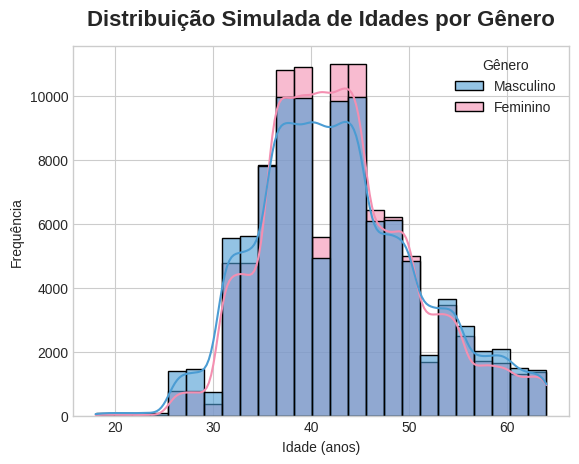

In [6]:
# Estilo
plt.style.use("seaborn-v0_8-whitegrid")

# Histograma
sns.histplot(data=df_idades, x="Idade", hue="Gênero", bins=25, kde=True, palette={"Masculino": "#4B9CD3", "Feminino": "#F48FB1"}, alpha=0.6, edgecolor="black")

# Título e eixos
plt.title("Distribuição Simulada de Idades por Gênero", fontsize=16, weight='bold', pad=15)
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.show()

## Simulação da base de dados

In [7]:
# Configuração da biblioteca Faker
fake = Faker('pt_BR')

# Obtém ano atual
ano_atual = datetime.now().year

# Cria o DataFrame para simulação
base_simulada = df_idades.copy()

# Colunas de ID
base_simulada["Identificação"] = range(1, len(base_simulada) + 1)

# Coluna de nascimento
anos_nasc = ano_atual - base_simulada["Idade"]
meses = np.random.randint(1, 13, size=len(base_simulada))
dias = np.random.randint(1, 29, size=len(base_simulada))
base_simulada["Nascimento"] = pd.to_datetime({"year": anos_nasc, "month": meses, "day": dias}).dt.date

# Coluna de data de ingresso
idades_ingresso = np.random.randint(18, base_simulada["Idade"] + 1)
anos_ingresso = ano_atual - idades_ingresso
base_simulada["Data de ingresso"] = pd.to_datetime({"year": anos_ingresso, "month": np.random.randint(1, 13, size=len(base_simulada)), "day": np.random.randint(1, 29, size=len(base_simulada))}).dt.date

# Coluna de remuneração
base_simulada["Remuneração"] = 5000

# Coluna de de idade provável de aposentadoria com base no sexo
base_simulada["Idade Provável de Aposentadoria"] = np.where(base_simulada["Gênero"] == "Masculino", 65, 60)

# Coluna de benefício
base_simulada["Beneficio"] = base_simulada["Remuneração"] * 0.8

# Coluna de tempo futuro de serviço
base_simulada['Tempo de serviço futuro'] = base_simulada['Idade Provável de Aposentadoria'] - base_simulada['Idade']

# Reordenar colunas
base_simulada = base_simulada[["Identificação", "Gênero", "Nascimento", "Remuneração", "Data de ingresso", "Idade", "Idade Provável de Aposentadoria", "Tempo de serviço futuro", "Beneficio"]]

# Reservas Matemáticas

In [8]:
# Ler aquivos com as tábuas

# Local
#df = pd.read_excel("tabuas.xlsx")

# Google drive
df = pd.read_excel("/content/drive/Othercomputers/Meu laptop/VSC/Python/tcc/tabuas.xlsx")

In [9]:
# Amostragem da simulação - base cadastral
base_cadastral = base_simulada.sample(300, replace=True)

In [10]:
base_cadastral.head()

,Identificação,Gênero,Nascimento,Remuneração,Data de ingresso,Idade,Idade Provável de Aposentadoria,Tempo de serviço futuro,Beneficio
129679,129680,Feminino,1983-05-26,5000,1985-12-22,42,60,18,4000.0
69214,69215,Masculino,1980-04-06,5000,1981-11-13,45,65,20,4000.0
43645,43646,Masculino,1978-06-06,5000,1981-06-26,47,65,18,4000.0
161454,161455,Feminino,1978-06-20,5000,1992-05-02,47,60,13,4000.0
126893,126894,Feminino,1987-03-16,5000,2007-10-23,38,60,22,4000.0


In [11]:
# Função para calcular a tabua de vida
def calcular_tabua(vetor_qx):

    # DataFrame vazio
    tabua = pd.DataFrame()

    # Idade
    tabua["Idade"] = [x for x in range(len(vetor_qx))]

    # Probabilidade de morte
    tabua["qx"] = vetor_qx

    # Calcular a probabilidade de sobrevivencia
    tabua["px"] = 1 - tabua["qx"]

    # Calcular o número de sobreviventes
    tabua["lx"] = 0.0
    tabua.loc[0, "lx"] = 100000.0
    for i in range(1, len(tabua)):
        tabua.loc[i, "lx"] = tabua.loc[i - 1, "lx"] * tabua.loc[i - 1, "px"]

    # Calcular o número de mortos
    tabua["dx"] = tabua["lx"] * tabua["qx"]

    # Calcular a expectativa de vida
    tabua["ex"] = 0.0
    for i in range(len(tabua)):
        tabua.loc[i,"ex"] = tabua.iloc[i:, tabua.columns.get_loc("px")].sum()

    # Retorna a tábua calculada
    return tabua

In [12]:
# Função para calcular o VABF
def VABF(base_cadastral, tabua, taxa, CS):
    # Resetar índices
    tabua = tabua.reset_index(drop=True)
    base_cadastral = base_cadastral.reset_index(drop=True)

    # Criar tabela de comutação
    comutacao = tabua.copy()

    # Calcular Dx
    comutacao["Dx"] = comutacao["lx"] * ((1 / (1 + taxa)) ** comutacao["Idade"])

    # Calcular Nx usando soma cumulativa reversa
    comutacao["Nx"] = comutacao["Dx"][::-1].cumsum()[::-1]

    # Calcular ax
    comutacao["ax"] = comutacao.apply(
        lambda row: (row["Nx"] / row["Dx"]) - (11/24) if row["Dx"] != 0 else 0,
        axis=1
    )

    # Calcular VABF individual
    VABF_list = []
    for i in range(len(base_cadastral)):
        b = base_cadastral.loc[i, 'Beneficio']
        r = base_cadastral.loc[i, 'Idade Provável de Aposentadoria']

        # Encontrar ax correspondente à idade r
        a = comutacao.loc[comutacao['Idade'] == r, 'ax'].values[0]

        vabf = a * b * 13 * CS
        VABF_list.append(vabf)

    # Retorna a soma dos VABFs individuais
    return sum(VABF_list)

In [13]:
# Função para calcular o VABF
def VACF(base_cadastral, tabua, taxa, CN, CS):
    # Resetar índices
    tabua = tabua.reset_index(drop=True)
    base_cadastral = base_cadastral.reset_index(drop=True)

    # Criar tabela de comutação
    comutacao = tabua.copy()
    comutacao["Dx"] = comutacao["lx"] * ((1 / (1 + taxa)) ** comutacao["Idade"])
    comutacao["Nx"] = comutacao["Dx"][::-1].cumsum()[::-1]

    # Calcular VACF individual
    VACF_list = []
    for i in range(len(base_cadastral)):

        # Remuneação do participante i
        s = base_cadastral.loc[i, 'Remuneração']

        # Idade do participante i
        x = base_cadastral.loc[i, 'Idade']

        # Idade provável de aposentadoria participante i
        n = base_cadastral.loc[i, 'Idade Provável de Aposentadoria']

        # Encontrar ax correspondente à idade r
        a_1 = ((comutacao.loc[comutacao['Idade'] == x, 'Nx'].values[0]) - (comutacao.loc[comutacao['Idade'] == n, 'Nx'].values[0])) / (comutacao.loc[comutacao['Idade'] == x, 'Dx'].values[0])
        a_2 = a_1 - ((11/24)*(1-((comutacao.loc[comutacao['Idade'] == n, 'Dx'].values[0])/(comutacao.loc[comutacao['Idade'] == x, 'Dx'].values[0]))))

        # Cálculo da contribuição
        c = (s * CN)

        # Cálculo do VACF para o participante i
        vacf = a_2 * 13 * c * CS

        # Adiciona o VACF para o participante i na lista
        VACF_list.append(vacf)

    # Retorna a soma dos VACFs individuais
    return sum(VACF_list)

In [14]:
# Função para formatação monetária
def formatar_brasileiro(valor):
    return f"{valor:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

In [15]:
# Tabuas de vida - por sexo
tabuas_Masc = ['IBGE 2023 M', 'IBGE 2023 A', 'AT-2000 (Suav 10%) M', 'AT-49 M', 'AT-2000 M', 'AT-50', 'AT-55', 'AT-83 Basic M', 'AT-83 IAM M', 'BR-EMSmt-v.2021 M', 'CDG-60', 'GAM-71 M', 'CSO80', 'GKF-95', 'GKM-70', 'GKM-95', 'GR-95 M', 'IBGE 2020 Extrap. M', 'Prudential-50', 'SGB-51', 'AMERICAN EXPERIENCE', 'RP-2000 M', 'SGB-75', 'Rentiers Francais', 'UP - 94 M', 'USTP - 61', '2012 AIM table M', 'CL5', 'CL6', 'IBGE 2019 Extrap. A', 'IBGE 2019 Extrap. M', 'IBGE 2018 Extrap. A', 'IBGE 2018 Extrap. M', 'Hunter Semitropical', 'Grupal Americana', 'BREMSmt 2015 M', 'BREMSsb 2015 M']
tabuas_Fem = ['IBGE 2023 F', 'IBGE 2023 A', 'AT-2000 (Suav 10%) F', 'AT-49 F', 'AT-2000 F', 'AT-50', 'AT-55', 'AT-83 Basic F', 'AT-83 IAM F', 'BR-EMSmt-v.2021 F', 'BR-EMSsb-v.2021 F', 'CDG-60', 'GAM-71 F', 'CSO80', 'GKF-95', 'GKM-70', 'GKM-95', 'GR-95 M', 'IBGE 2020 Extrap. F', 'Prudential-50', 'SGB-51', 'AMERICAN EXPERIENCE', 'RP-2000 F', 'SGB-75', 'Rentiers Francais', 'UP - 94 F', 'USTP - 61', '2012 AIM table F', 'CL5', 'CL6','IBGE 2019 Extrap. A', 'IBGE 2019 Extrap. F', 'IBGE 2018 Extrap. A', 'IBGE 2018 Extrap. F', 'Hunter Semitropical', 'Grupal Americana', 'BREMSmt 2015 F', 'BREMSsb 2015 F', ]

In [18]:
# Calculando a RM e testando o Art. 36 para a base cadastral maculina

# Lista para armezenamento
lista_vabf = []
lista_vacf = []
lista_ex = []
lista_rm = []

# Obtém a idade média da base cadastral
idade_media = int(base_cadastral['Idade'].mean())

# Loop para iterar sobre as tábuas e calcular a reserva matemática
for tabua in tabuas_Masc:

    # Probabilidade de morte da tábua
    vetor_qx = df[tabua]
    if vetor_qx.dtype == object:
        vetor_qx = vetor_qx.str.replace(",", ".").astype(float)

    # Filtro do generêro da base cadastral
    base = base_cadastral[base_cadastral['Gênero'] == 'Masculino']

    # Calcular a tábua de vida
    tabua_de_vida = calcular_tabua(vetor_qx)

    # Calcular o VABF
    vabf = VABF(base, tabua_de_vida, 0.05, 0.98)

    # Calcular o VACF
    vacf = VACF(base, tabua_de_vida, 0.05, 0.2, 0.98)

    # Calculo da reserva matemática
    rm = vabf - vacf

    # Obtém a expectativa de vida na idade média
    ex_im = tabua_de_vida.loc[idade_media,'ex']

    # Adiciona os valores as suas devidas listas
    lista_vabf.append(formatar_brasileiro(vabf))
    lista_vacf.append(formatar_brasileiro(vacf))
    lista_rm.append(formatar_brasileiro(rm))
    lista_ex.append(round(ex_im, 2))

# DataFrame com os resultados
df_comp = pd.DataFrame({'Tábua': tabuas_Masc, 'VABF': lista_vabf, 'VACF': lista_vacf, 'RM': lista_rm,'ex': lista_ex})

# Comparar com a primeira linha
ref_ex = df_comp.loc[0, 'ex']
ref_RM = df_comp.loc[0, 'RM']

# Verificação do Art 36
df_comp['Art36_OK'] = (df_comp['ex'] >= ref_ex) & (df_comp['RM'] <= ref_RM)

In [19]:
df_comp

,Tábua,VABF,VACF,RM,ex,Art36_OK
0,IBGE 2023 M,"84.320.552,16","24.793.194,72","59.527.357,44",45.28,True
1,IBGE 2023 A,"88.882.543,50","25.113.193,44","63.769.350,05",45.54,False
2,AT-2000 (Suav 10%) M,"96.549.509,20","25.517.363,85","71.032.145,35",62.11,False
3,AT-49 M,"78.869.770,99","24.803.231,93","54.066.539,06",55.24,True
4,AT-2000 M,"93.963.629,07","25.449.857,32","68.513.771,75",61.49,False
5,AT-50,"78.618.733,65","24.802.431,76","53.816.301,89",56.02,True
6,AT-55,"81.748.283,04","25.125.009,51","56.623.273,53",58.66,True
7,AT-83 Basic M,"82.179.881,77","25.239.877,43","56.940.004,34",57.08,True
8,AT-83 IAM M,"91.102.242,27","25.317.879,41","65.784.362,86",60.80,False
9,BR-EMSmt-v.2021 M,"91.269.894,06","25.337.222,37","65.932.671,69",59.17,False


In [17]:
# Calculando a RM e testando o Art. 36 para a base cadastral feminina

# Lista para armezenamento
lista_vabf = []
lista_vacf = []
lista_ex = []
lista_rm = []

# Obtém a idade média da base cadastral
idade_media = int(base_cadastral['Idade'].mean())

# Loop para iterar sobre as tábuas e calcular a reserva matemática
for tabua in tabuas_Fem:

    # Probabilidade de morte da tábua
    vetor_qx = df[tabua]
    if vetor_qx.dtype == object:
        vetor_qx = vetor_qx.str.replace(",", ".").astype(float)

    # Filtro do generêro da base cadastral
    base = base_cadastral[base_cadastral['Gênero'] == 'Feminino']

    # Calcular a tábua de vida
    tabua_de_vida = calcular_tabua(vetor_qx)

    # Calcular o VABF
    vabf = VABF(base, tabua_de_vida, 0.05, 0.98)

    # Calcular o VACF
    vacf = VACF(base, tabua_de_vida, 0.05, 0.2, 0.98)

    # Calculo da reserva matemática
    rm = vabf - vacf

    # Obtém a expectativa de vida na idade média
    ex_im = tabua_de_vida.loc[idade_media,'ex']

    # Adiciona os valores as suas devidas listas
    lista_vabf.append(formatar_brasileiro(vabf))
    lista_vacf.append(formatar_brasileiro(vacf))
    lista_rm.append(formatar_brasileiro(rm))
    lista_ex.append(round(ex_im, 2))

# DataFrame com os resultados
df_comp = pd.DataFrame({'Tábua': tabuas_Fem, 'VABF': lista_vabf, 'VACF': lista_vacf, 'RM': lista_rm,'ex': lista_ex})

# Comparar com a primeira linha
ref_ex = df_comp.loc[0, 'ex']
ref_RM = df_comp.loc[0, 'RM']

# Verificação do Art 36
df_comp['Art36_OK'] = (df_comp['ex'] >= ref_ex) & (df_comp['RM'] <= ref_RM)
df_comp

,Tábua,VABF,VACF,RM,ex,Art36_OK
0,IBGE 2023 F,"96.386.245,56","19.023.219,16","77.363.026,40",45.73,True
1,IBGE 2023 A,"92.470.665,38","18.849.093,24","73.621.572,14",45.54,False
2,AT-2000 (Suav 10%) F,"106.190.749,61","19.232.064,51","86.958.685,10",62.75,False
3,AT-49 F,"93.924.675,56","19.048.717,01","74.875.958,55",56.11,True
4,AT-2000 F,"104.385.552,43","19.212.052,19","85.173.500,24",62.24,False
5,AT-50,"83.113.870,40","18.711.517,34","64.402.353,05",56.02,True
6,AT-55,"86.411.507,90","18.881.655,52","67.529.852,38",58.66,True
7,AT-83 Basic F,"100.735.168,83","19.200.061,52","81.535.107,31",58.36,False
8,AT-83 IAM F,"103.872.030,98","19.198.592,34","84.673.438,64",62.13,False
9,BR-EMSmt-v.2021 F,"102.831.702,53","19.142.555,00","83.689.147,53",61.57,False


# Razão entre $q_x$e $p_x$

In [22]:
# Dicionário com as tábuas de mortalidade
tabuas = {
    'IBGE 2023 M': calcular_tabua(df['IBGE 2023 M']),
    'IBGE 2023 A': calcular_tabua(df['IBGE 2023 A']),
    'BREMS': calcular_tabua(df['BR-EMSmt-v.2021 M']),
    'CSO80': calcular_tabua(df['CSO80']),
    'AT83': calcular_tabua(df['AT-83 Basic M'])
}

# Criação do DataFrame com idades
idades = tabuas['IBGE 2023 M'].index
df_razao_qx = pd.DataFrame({'idade': idades})

# Tábua base de comparação (IBGE 2023 M)
qx_base = tabuas['IBGE 2023 M']['qx']

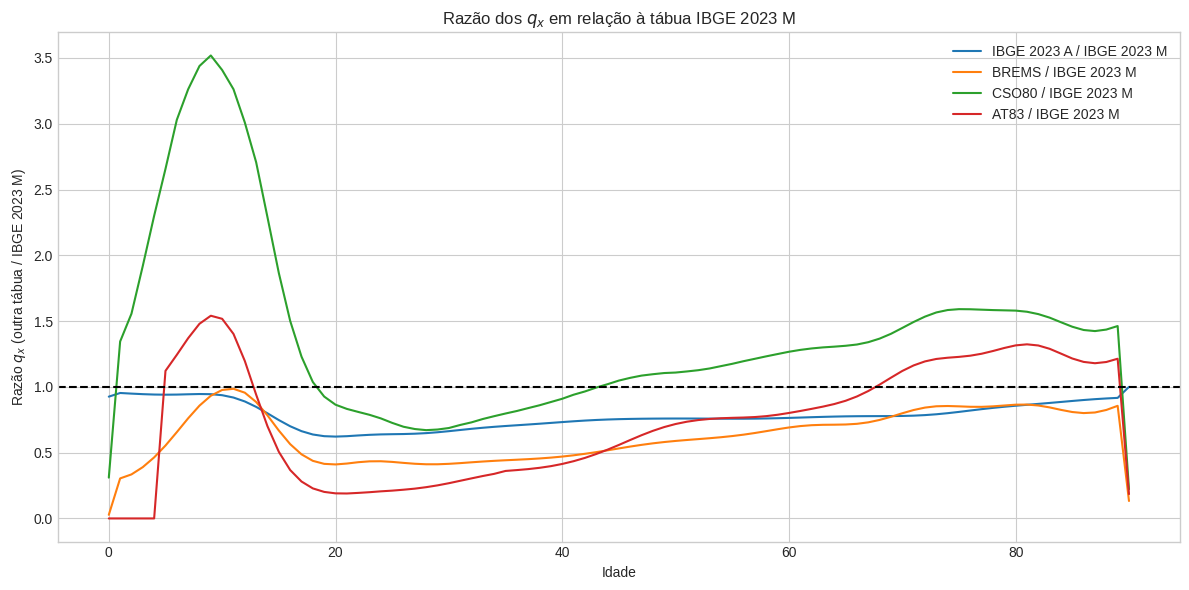

In [32]:
# Criação do DataFrame com idades
idades = tabuas['IBGE 2023 M'].index
df_razao_qx = pd.DataFrame({'idade': idades})

# Tábua base de comparação (IBGE 2023 M)
qx_base = tabuas['IBGE 2023 M']['qx']

# Cálculo das razões qx
for nome, tabua in tabuas.items():
    if nome != 'IBGE 2023 M':
        df_razao_qx[f'{nome} / IBGE 2023 M'] = tabua['qx'] / qx_base

# Gráfico
plt.figure(figsize=(12, 6))
for coluna in df_razao_qx.columns[1:]:
    plt.plot(df_razao_qx['idade'], df_razao_qx[coluna], label=coluna)

# Linha horizontal em y=1
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)

# Título e eixos
plt.xlabel('Idade')
plt.ylabel('Razão $q_x$ (outra tábua / IBGE 2023 M)')
plt.title('Razão dos $q_x$ em relação à tábua IBGE 2023 M')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

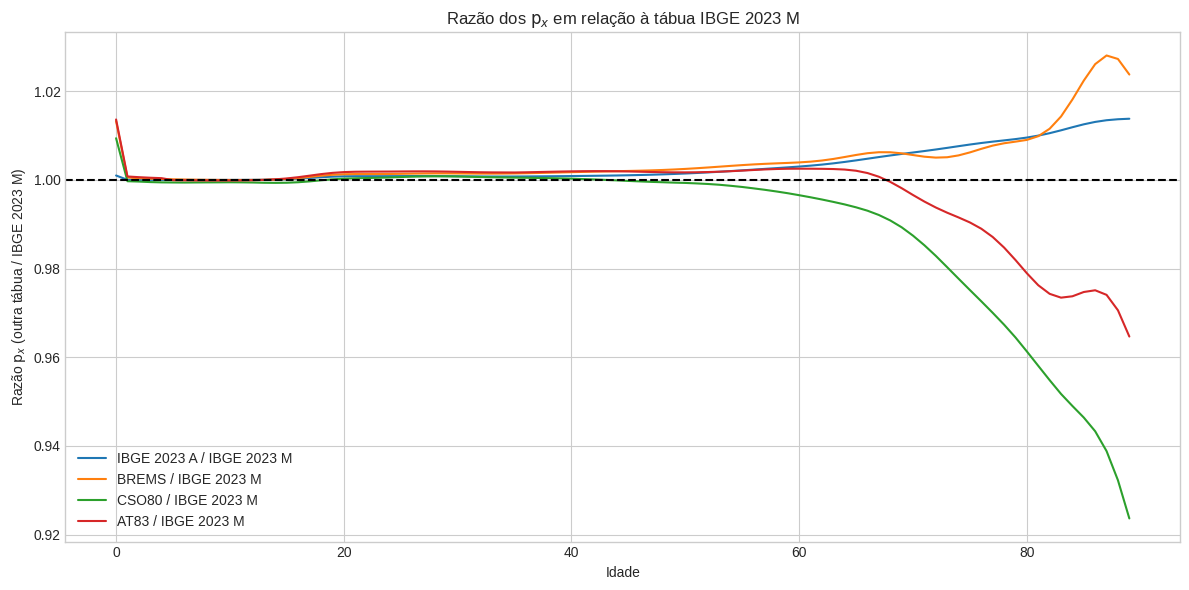

In [27]:
# Tábua base de comparação (IBGE 2023 M)
qx_base = tabuas['IBGE 2023 M']['px']

# Cálculo das razões qx
for nome, tabua in tabuas.items():
    if nome != 'IBGE 2023 M':
        df_razao_qx[f'{nome} / IBGE 2023 M'] = tabua['px'] / qx_base

# Gráfico
plt.figure(figsize=(12, 6))
for coluna in df_razao_qx.columns[1:]:
    plt.plot(df_razao_qx['idade'], df_razao_qx[coluna], label=coluna)

# Linha horizontal em y=1
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)

plt.xlabel('Idade')
plt.ylabel('Razão $\mathrm{p}_x$ (outra tábua / IBGE 2023 M)')
plt.title(r'Razão dos $\mathrm{p}_x$ em relação à tábua IBGE 2023 M')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()